In [59]:
import numpy as np # libreria matematica
import pandas as pd # extiende funcionalidades de numpy
import matplotlib.pyplot as plt #para graficar
import seaborn as sb #es una sobrecapa de matplotlib para estadistica


In [60]:
%matplotlib inline
#las gráficas se muestran en el mismo Jupiter


In [61]:
pd.read_csv #este método nos permite impoortar los datos desde un csv y cargarlo a un dataFrame, que es la estructura de Pandas

movies = pd.read_csv('vol/datasets/peliculas.csv', encoding='utf-8')#Data frame
type(movies) 

pandas.core.frame.DataFrame

In [62]:
movies.head() #Te muestra las primeras 5 columnas del csv
movies.shape #es la dimensión que tiene nuestra matriz
movies.columns

Index(['movie_title', 'title_year', 'color', 'aspect_ratio', 'duration',
       'language', 'country', 'duration.1', 'genres', 'content_rating',
       'plot_keywords', 'director_name', 'actor_1_name', 'actor_2_name',
       'actor_3_name', 'cast_total_facebook_likes', 'budget', 'imdb_score',
       'gross'],
      dtype='object')

In [63]:
#acceder al index
movies.index

RangeIndex(start=0, stop=5043, step=1)

In [64]:
columna1 = movies['movie_title']#acceder facilmente a una columna
columna1.head()

0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
Name: movie_title, dtype: object

In [65]:
linea = movies.loc[10,:]#10ma linea y todo 
linea

movie_title                                Batman v Superman: Dawn of Justice 
title_year                                                                2016
color                                                                    Color
aspect_ratio                                                              2.35
duration                                                                   183
language                                                               English
country                                                                    USA
duration.1                                                                 183
genres                                                 Action|Adventure|Sci-Fi
content_rating                                                           PG-13
plot_keywords                based on comic book|batman|sequel to a reboot|...
director_name                                                      Zack Snyder
actor_1_name                                        

In [66]:
#El metodo loc permite acceder de manera muy sencilla a las columnas
movies.loc[:,'movie_title'].head()#todas las lineas 

0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
Name: movie_title, dtype: object

# Intentemos entender y analizar estos datos

Para tener una vista general de lo que hay en el dataframe se realiza con el metodo info
Nos da todas las columnas la cantidad de elementos no nulos, por ultimo el tipo de cada columna
pandas A comparación de NUMPy  nos permite analizar texto


In [67]:
#Separamemos las columnas númericas de de las culumnas de texto
movies.dtypes#devuelve todos los tipos de las columnas
#nos regreso un tyo de dato SERIE que es un dataframe que al final tiene una sola columna


movie_title                   object
title_year                   float64
color                         object
aspect_ratio                 float64
duration                     float64
language                      object
country                       object
duration.1                   float64
genres                        object
content_rating                object
plot_keywords                 object
director_name                 object
actor_1_name                  object
actor_2_name                  object
actor_3_name                  object
cast_total_facebook_likes      int64
budget                       float64
imdb_score                   float64
gross                        float64
dtype: object

In [68]:
movies.dtypes == float #regresa solo los tapos de tipo float

movie_title                  False
title_year                    True
color                        False
aspect_ratio                  True
duration                      True
language                     False
country                      False
duration.1                    True
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes    False
budget                        True
imdb_score                    True
gross                         True
dtype: bool

In [69]:
#se pueden aplicar operaciones aritmeticas a estos datos
(movies.dtypes == float) == (movies.dtypes == int)

movie_title                   True
title_year                   False
color                         True
aspect_ratio                 False
duration                     False
language                      True
country                       True
duration.1                   False
genres                        True
content_rating                True
plot_keywords                 True
director_name                 True
actor_1_name                  True
actor_2_name                  True
actor_3_name                  True
cast_total_facebook_likes    False
budget                       False
imdb_score                   False
gross                        False
dtype: bool

In [70]:
#pandas maneja las columnas de texto como objetos
movies.dtypes == object

movie_title                   True
title_year                   False
color                         True
aspect_ratio                 False
duration                     False
language                      True
country                       True
duration.1                   False
genres                        True
content_rating                True
plot_keywords                 True
director_name                 True
actor_1_name                  True
actor_2_name                  True
actor_3_name                  True
cast_total_facebook_likes    False
budget                       False
imdb_score                   False
gross                        False
dtype: bool

In [71]:
#Creamos una lista con el nombre de las columnas que son numero
num = (movies.dtypes == float) | (movies.dtypes == int)
num
#creamos una lista con el nombre de las columnas que son texto

movie_title                  False
title_year                    True
color                        False
aspect_ratio                  True
duration                      True
language                     False
country                      False
duration.1                    True
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes     True
budget                        True
imdb_score                    True
gross                         True
dtype: bool

In [72]:
#el index es el nombre de las columnas
num.index

Index(['movie_title', 'title_year', 'color', 'aspect_ratio', 'duration',
       'language', 'country', 'duration.1', 'genres', 'content_rating',
       'plot_keywords', 'director_name', 'actor_1_name', 'actor_2_name',
       'actor_3_name', 'cast_total_facebook_likes', 'budget', 'imdb_score',
       'gross'],
      dtype='object')

In [73]:
#a mi me interesan sacar todas las que tienen true o false
for el in num.index:
    print (el)

movie_title
title_year
color
aspect_ratio
duration
language
country
duration.1
genres
content_rating
plot_keywords
director_name
actor_1_name
actor_2_name
actor_3_name
cast_total_facebook_likes
budget
imdb_score
gross


In [74]:
#Obtenemos todas las columnas de num index, se agregan en la lista que son true
num_cols = [c for c in num.index if num[c]]

In [75]:
num_cols #columnas con numeros

['title_year',
 'aspect_ratio',
 'duration',
 'duration.1',
 'cast_total_facebook_likes',
 'budget',
 'imdb_score',
 'gross']

In [76]:
obj = (movies.dtypes == object)
obj_cols =[c for c in obj.index if obj[c]]

In [77]:
obj_cols#columnas de texto

['movie_title',
 'color',
 'language',
 'country',
 'genres',
 'content_rating',
 'plot_keywords',
 'director_name',
 'actor_1_name',
 'actor_2_name',
 'actor_3_name']

In [78]:
movies_num = movies[num_cols]

In [79]:
movies_num

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0
2,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0
3,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0
4,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN
...,...,...,...,...,...,...,...,...
5038,2013.0,NaN,87.0,87.0,2283,NaN,7.7,NaN
5039,NaN,16.00,43.0,43.0,1753,NaN,7.5,NaN
5040,2013.0,NaN,76.0,76.0,0,1400.0,6.3,NaN
5041,2012.0,2.35,100.0,100.0,2386,NaN,6.3,10443.0


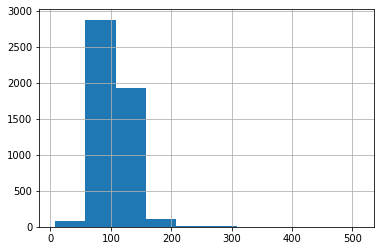

In [80]:
#Estadisticas de las columnas númericas 
movies_num['duration'].hist()

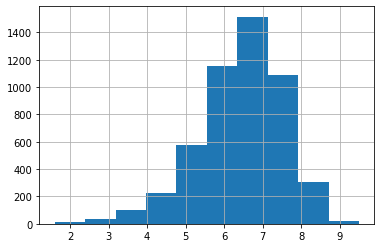

In [81]:
movies_num['imdb_score'].hist()

In [82]:
(movies_num['budget'] >1e9).value_counts()

False    5037
True        6
Name: budget, dtype: int64

In [83]:
#arriba podemos ver que solo 6 peliculas sobrepasaron el presupesto de el billon
mask = (movies_num['budget'] >1e9)

In [84]:
mask#Mask tiene todos los valores que no se cumplieron en la condición

0       False
1       False
2       False
3       False
4       False
        ...  
5038    False
5039    False
5040    False
5041    False
5042    False
Name: budget, Length: 5043, dtype: bool

In [85]:
movies[mask]

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
2323,Princess Mononoke,1997.0,Color,1.85,134.0,Japanese,Japan,134.0,Adventure|Animation|Fantasy,PG-13,anime|cult film|forest|princess|studio ghibli,Hayao Miyazaki,Minnie Driver,Jada Pinkett Smith,Billy Crudup,2710,2.400000e+09,8.4,2298191.0
2334,Steamboy,2004.0,Color,1.85,103.0,Japanese,Japan,103.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,PG-13,19th century|ball|boy|inventor|steam,Katsuhiro Ôtomo,William Hootkins,Robin Atkin Downes,Rosalind Ayres,991,2.127520e+09,6.9,410388.0
2988,The Host,2006.0,Color,1.85,110.0,Korean,South Korea,110.0,Comedy|Drama|Horror|Sci-Fi,R,daughter|han river|monster|river|seoul,Joon-ho Bong,Doona Bae,Kang-ho Song,Ah-sung Ko,1173,1.221550e+10,7.0,2201412.0
3005,Fateless,2005.0,Color,2.35,134.0,Hungarian,Hungary,134.0,Drama|Romance|War,R,bus|death|gay slur|hatred|jewish,Lajos Koltai,Marcell Nagy,Péter Fancsikai,Bálint Péntek,11,2.500000e+09,7.1,195888.0
3423,Akira,1988.0,Color,1.85,124.0,Japanese,Japan,124.0,Action|Animation|Sci-Fi,R,based on manga|biker gang|gifted child|post th...,Katsuhiro Ôtomo,Mitsuo Iwata,Takeshi Kusao,Tesshô Genda,28,1.100000e+09,8.1,439162.0
3859,Lady Vengeance,2005.0,Color,2.35,112.0,Korean,South Korea,112.0,Crime|Drama,R,cake|christian|lesbian sex|oral sex|pregnant s...,Chan-wook Park,Min-sik Choi,Yeong-ae Lee,Hye-jeong Kang,907,4.200000e+09,7.7,211667.0


In [86]:
pd.read_csv('vol/datasets/thenumbers.csv')

,Unnamed: 0,movie_name,domestic_gross,movie_link,production_budget,release_date,worldwide_gross,movie_title
0,0,Avatar,760507625,http://www.the-numbers.com/movie/Avatar#tab=su...,425000000,12/18/2009,2783918982,Avatar
1,1,Star Wars Ep. VII: The Force Awakens,936662225,http://www.the-numbers.com/movie/Star-Wars-Ep-...,306000000,12/18/2015,2058662225,Star Wars: Episode VII - The Force Awakens ...
2,2,Pirates of the Caribbean: At World's End,309420425,http://www.the-numbers.com/movie/Pirates-of-th...,300000000,5/24/2007,963420425,Pirates of the Caribbean: At World's End
3,3,Spectre,200074175,http://www.the-numbers.com/movie/Spectre#tab=s...,300000000,11/6/2015,879620923,Spectre
4,4,The Dark Knight Rises,448139099,http://www.the-numbers.com/movie/Dark-Knight-R...,275000000,7/20/2012,1084439099,The Dark Knight Rises
...,...,...,...,...,...,...,...,...
4336,5157,The Mongol King,900,http://www.the-numbers.com/movie/Mongol-King-T...,7000,1/1/2004,900,The Mongol King
4337,5160,Signed Sealed Delivered,0,http://www.the-numbers.com/movie/Signed-Sealed...,5000,9/29/2015,0,Signed Sealed Delivered
4338,5161,Shanghai Calling,10443,http://www.the-numbers.com/movie/Shanghai-Call...,3967,2/15/2013,10443,Shanghai Calling
4339,5162,A Plague So Pleasant,0,http://www.the-numbers.com/movie/Plague-So-Ple...,1400,9/29/2015,0,A Plague So Pleasant


## Nos interesan de esta nueva base de datos el World Wide_gross y el budget

In [87]:
# Vamos a ahacer un merge de columnas 
financials = pd.read_csv('vol/datasets/thenumbers.csv')

In [88]:
financials = financials[['movie_title','production_budget','worldwide_gross']]

In [89]:
financials.shape

(4341, 3)

In [90]:
#Si los dataframe tienen diferentes nombres se tiene que hacer manuealmente
movies_num = pd.concat([movies_num,movies['movie_title']],axis=1)#por defecto es linea x linea para que se haga con columnas se agrega al axis 

In [91]:
movies_v2 = pd.merge(financials,movies_num,on ='movie_title', how = 'left')#on es la llave

In [92]:
movies_v2.shape

(4385, 11)

In [93]:
movies_v2.notnull()#muestra donde hay falores y donde %notebook

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,False,False,False,False,True,False,True,False
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
4380,True,True,True,True,False,True,True,True,True,True,False
4381,True,True,True,True,False,True,True,True,False,True,False
4382,True,True,True,True,True,True,True,True,False,True,True
4383,True,True,True,True,False,True,True,True,True,True,False


In [94]:
movies_v2.notnull().apply(pd.Series.value_counts)#columna x columna encuantra los datos no nullos

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,NaN,27,274,13,13,NaN,335,NaN,671
True,4385.0,4385.0,4385.0,4358,4111,4372,4372,4385.0,4050,4385.0,3714


In [95]:
(movies_v2 != 0).apply(pd.Series.value_counts) #Valores que son 0

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,281,NaN,NaN,NaN,NaN,27,NaN,NaN,NaN
True,4385.0,4385.0,4104,4385.0,4385.0,4385.0,4385.0,4358,4385.0,4385.0,4385.0


In [96]:
available = ( (movies_v2 != 0)  & (movies_v2.notnull()) )#Regresa un dataframe con false en los datos faltantes

In [97]:
available.shape

(4385, 11)

In [98]:
#Veamos la forma que vamos a tener en caso de que le quitemos los valores no nulos
available.all(axis =1).value_counts()

True     3408
False     977
dtype: int64

In [99]:
#Perderiamos casi mil datos
mask = available['worldwide_gross']

In [100]:
movies_v2 = movies_v2[mask]#Anexamos a nuestro Dataframe los dadtos importantes y los anexamos

In [101]:
movies_v2

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,425000000,2783918982,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,Star Wars: Episode VII - The Force Awakens ...,306000000,2058662225,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN
2,Pirates of the Caribbean: At World's End,300000000,963420425,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0
3,Spectre,300000000,879620923,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0
4,The Dark Knight Rises,275000000,1084439099,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0
...,...,...,...,...,...,...,...,...,...,...,...
4378,Primer,7000,841926,2004.0,1.85,77.0,77.0,368,7000.0,7.0,424760.0
4379,Cavite,7000,71644,2005.0,NaN,80.0,80.0,0,7000.0,6.3,70071.0
4380,The Mongol King,7000,900,2005.0,NaN,84.0,84.0,93,3250.0,7.8,NaN
4382,Shanghai Calling,3967,10443,2012.0,2.35,100.0,100.0,2386,NaN,6.3,10443.0


In [102]:
#Verificamos la limpieza de nuestros datos
((movies_v2 != 0 ) & (movies_v2.notnull())).worldwide_gross.value_counts()

True    4104
Name: worldwide_gross, dtype: int64

In [103]:
from sklearn.impute import SimpleImputer#imputer es una clase
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')#el primer parametro es NaN y cuadno lo vea va a tomar la estrategia de poner el vlaor medio de la columna


In [104]:
movies_v2=movies_v2.drop('movie_title',axis=1)#columna no numerica

In [105]:
movies_v2= movies_v2.drop('duration',axis=1)#se elimina columna duplicada

In [106]:
values = imputer.fit_transform(movies_v2)#transformamos la información de manera que pueda ser trbaja en python

In [109]:
movies_v2.values #Valores sin transformar

array([[4.25000000e+08, 2.78391898e+09, 2.00900000e+03, ...,
        2.37000000e+08, 7.90000000e+00, 7.60505847e+08],
       [3.06000000e+08, 2.05866222e+09,            nan, ...,
                   nan, 7.10000000e+00,            nan],
       [3.00000000e+08, 9.63420425e+08, 2.00700000e+03, ...,
        3.00000000e+08, 7.10000000e+00, 3.09404152e+08],
       ...,
       [7.00000000e+03, 9.00000000e+02, 2.00500000e+03, ...,
        3.25000000e+03, 7.80000000e+00,            nan],
       [3.96700000e+03, 1.04430000e+04, 2.01200000e+03, ...,
                   nan, 6.30000000e+00, 1.04430000e+04],
       [1.10000000e+03, 1.81041000e+05, 2.00400000e+03, ...,
        1.10000000e+03, 6.60000000e+00, 8.52220000e+04]])

In [107]:
values#Valores transformados

array([[4.25000000e+08, 2.78391898e+09, 2.00900000e+03, ...,
        2.37000000e+08, 7.90000000e+00, 7.60505847e+08],
       [3.06000000e+08, 2.05866222e+09, 2.00213073e+03, ...,
        4.04553863e+07, 7.10000000e+00, 4.83193329e+07],
       [3.00000000e+08, 9.63420425e+08, 2.00700000e+03, ...,
        3.00000000e+08, 7.10000000e+00, 3.09404152e+08],
       ...,
       [7.00000000e+03, 9.00000000e+02, 2.00500000e+03, ...,
        3.25000000e+03, 7.80000000e+00, 4.83193329e+07],
       [3.96700000e+03, 1.04430000e+04, 2.01200000e+03, ...,
        4.04553863e+07, 6.30000000e+00, 1.04430000e+04],
       [1.10000000e+03, 1.81041000e+05, 2.00400000e+03, ...,
        1.10000000e+03, 6.60000000e+00, 8.52220000e+04]])

In [110]:
#LLevemos el array a un dataframe
X = pd.DataFrame(values)
X.columns = movies_v2.columns#definir losindexes

In [112]:
X.index = movies_v2.index # 

In [114]:
X.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2.058662e+09,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,4.831933e+07
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08


In [116]:
#tenemos datFrame listo para poder ser trabajado
X.to_csv('vol/intermediate_results/X.csv')